# Predicting Boston Housing Prices Using XGBoost

## Overview

This project aims to predict the median value of owner-occupied homes in the Boston area based on various socioeconomic and environmental factors. The dataset includes features such as the crime rate, property tax, proximity to highways, average number of rooms, and pollution levels. The primary goal is to build an accurate regression model that can estimate housing prices using machine learning techniques, with XGBoost as the chosen model for its high performance on structured data.

## Problem Statement

The Boston housing market is influenced by multiple factors, and accurately predicting house prices is essential for various stakeholders, such as real estate professionals, policymakers, and potential homebuyers. The challenge is to build a model that can predict the median value of homes (in $1000s) given 13 distinct features that describe the socioeconomic and environmental conditions of different areas in Boston.

This project explores the following questions:
- How can we accurately predict housing prices using machine learning models?
- Which features play the most significant role in determining the price of a home?
- Can advanced models like XGBoost outperform simpler regression models in terms of predictive accuracy?

## Summary

The dataset was preprocessed, with non-relevant features removed and the remaining features scaled. Multiple models were tested, including Linear Regression, Decision Trees, and XGBoost. Among these, XGBoost yielded the best performance with a **Mean Squared Error (MSE)** of 8.34 and an **R² score** of 0.907, indicating that the model explains over 90% of the variance in housing prices.

### Key Steps:
1. **Data Preprocessing**: Features were scaled and non-relevant columns were removed.
2. **Model Selection**: Several regression models were applied, including Linear Regression, Decision Trees, and XGBoost.
3. **Model Evaluation**: XGBoost provided the most accurate predictions with a high R² score and low MSE.
4. **Feature Importance**: The model can also be analyzed to determine which factors most strongly influence housing prices.

This project demonstrates the effectiveness of XGBoost in predicting housing prices and highlights the importance of data preprocessing and model selection in machine learning workflows.

### Data Import and Explore

In [17]:
import pandas as pd

# Load the dataset to understand its structure
df = pd.read_csv(r'./res/train.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [18]:
# Dropping the 'ID' column
df.drop(columns=['ID'], inplace=True)

In [19]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Extracting the correlations of features with the target variable 'medv'
correlations_with_medv = correlation_matrix['medv'].sort_values(ascending=False)

# Display the correlations
correlations_with_medv

medv       1.000000
rm         0.689598
zn         0.344842
black      0.336660
dis        0.249422
chas       0.204390
rad       -0.352251
age       -0.358888
crim      -0.407454
nox       -0.413054
tax       -0.448078
indus     -0.473932
ptratio   -0.481376
lstat     -0.738600
Name: medv, dtype: float64

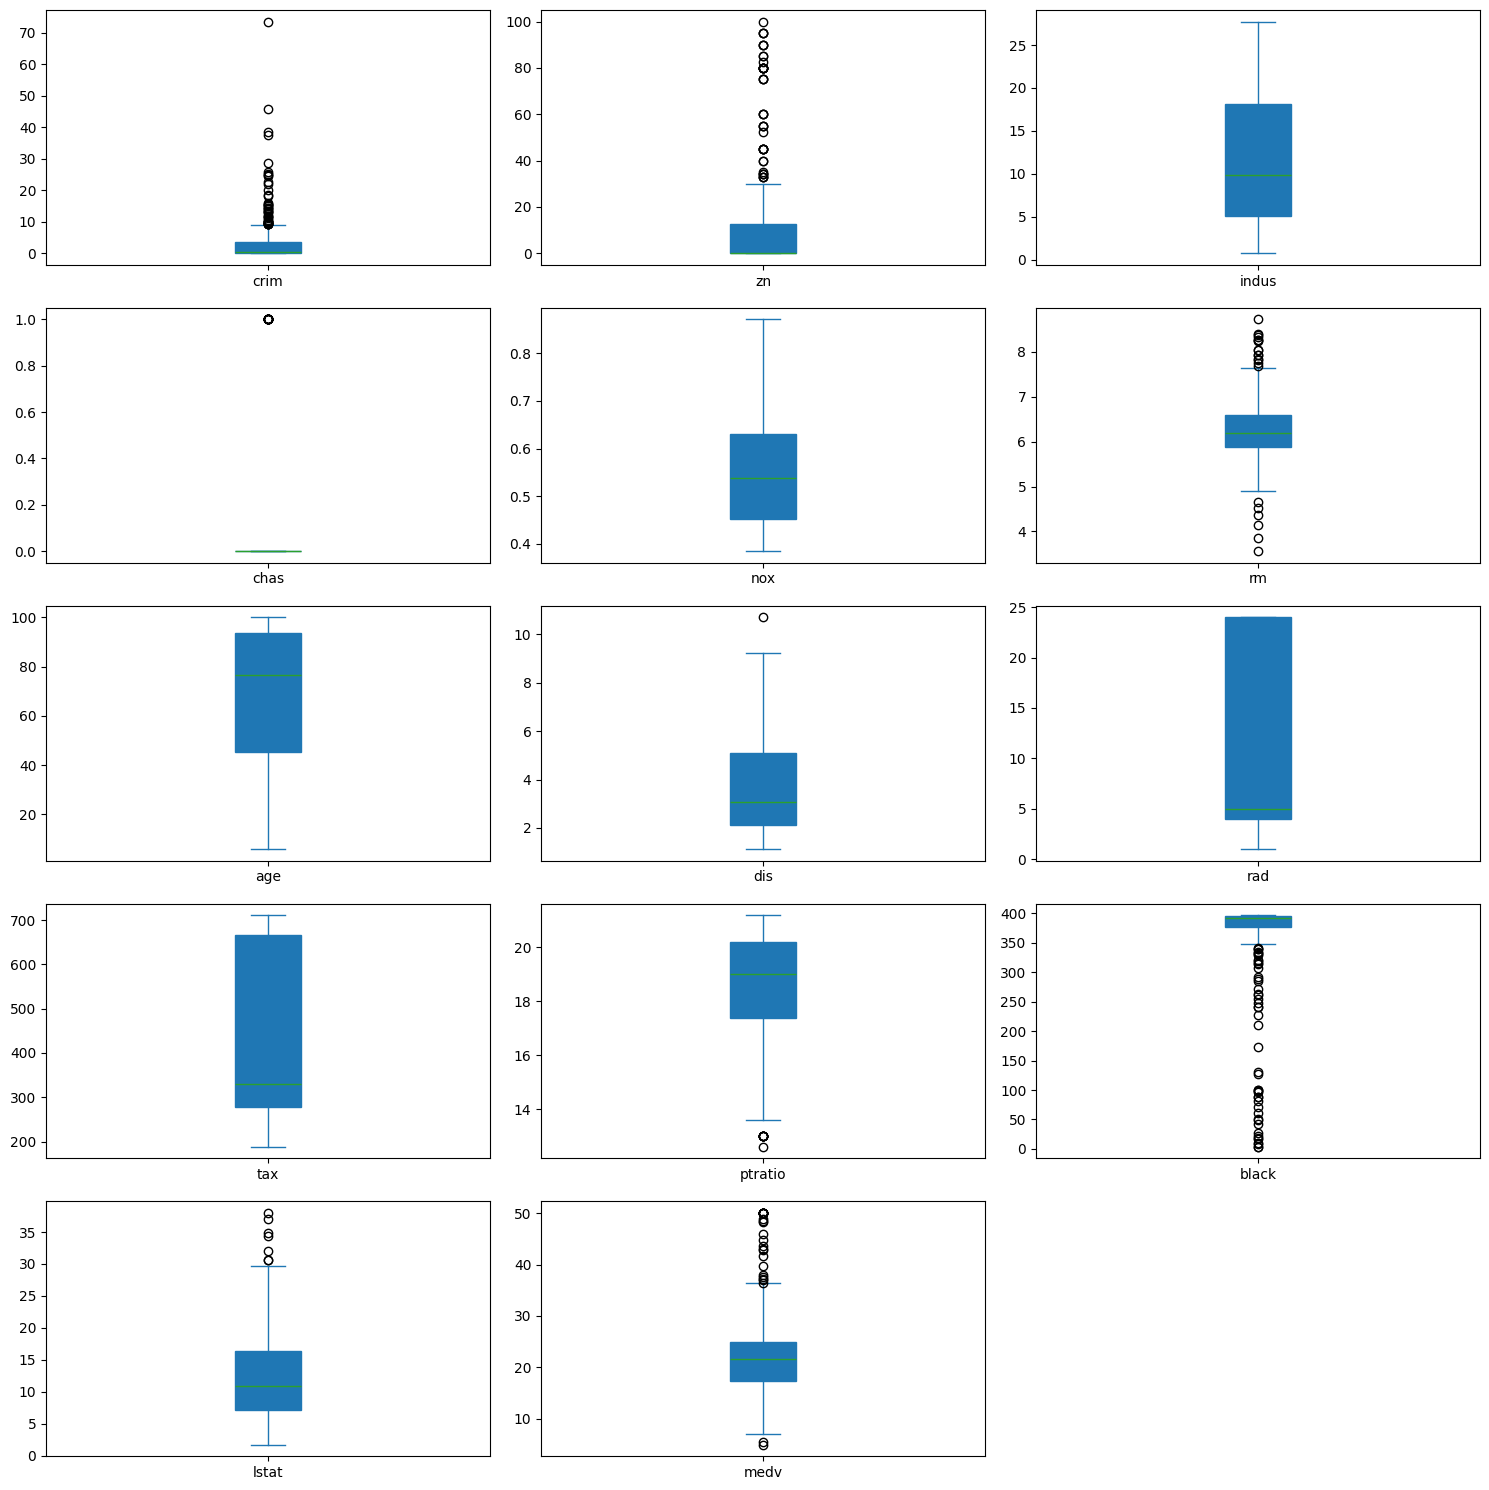

In [20]:
import matplotlib.pyplot as plt

# Plotting boxplots for each feature to visually inspect for outliers
df.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 15), patch_artist=True)
plt.tight_layout()
plt.show()

In [21]:
# Dropping the weaker features: 'chas', 'zn', 'rad', and 'black'
features_to_drop = ['chas', 'zn', 'rad', 'black']
df_cleaned = df.drop(columns=features_to_drop)

### Splitting Data

In [22]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X = df.drop(columns=['medv'])
y = df['medv']

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

# Apply standard scaling after the split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting back to DataFrame for clearer view
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model on the scaled training data
linear_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = linear_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
mse, r2

(23.48673519542582, 0.7390315860425438)

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model on the scaled training data
decision_tree.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_dt = decision_tree.predict(X_test_scaled)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display the evaluation metrics
mse_dt, r2_dt

(24.43388059701492, 0.728507559131901)

### XGBoost

In [26]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the XGBoost Regressor with optimized parameters
xgboost_reg = xgb.XGBRegressor(
    # objective='reg:squarederror',
    # n_estimators=100,        # Limit the number of trees
    # max_depth=4,             # Limit the depth of trees
    # learning_rate=0.1,       # Step size shrinkage
    # random_state=42
)

# Train the model
xgboost_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_xgb = xgboost_reg.predict(X_test_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R² Score: {r2_xgb}")

Mean Squared Error (MSE): 8.338724604392741
R² Score: 0.9073458394140619
